# Learning Some Geometric/Clifford Algebra
>  It's time I stopped being scared of the words "Clifford algebra"

- toc: true 
- badges: true
- comments: true
- author: Scott H. Hawley
- image: images/cliffords.png

--- 

### *Work in progress / Still writing this one!*  Oct 15, 2021

---


## Motiviations
1. The recent paper, ["Lightweight Convolutional Neural Networks By Hypercomplex Parameterization"](https://arxiv.org/abs/2110.04176). i.e, the potential for interesting (multichannel audio) signal processing applications of deep learning + hypercomplex numbers. 
2. The fact that, even as theoretical physicist (of *classical field theory*), I never learned enough about particle physics / QFT because I hated Dirac spinors, Pauli matrices, quaternions, and such.  Thus this is an attempt to finally overcome my ignorance and aversion to an important and useful area of mathematics/physics!

## References I'm finding to be helpful

* [Slehars' blog post](https://slehar.wordpress.com/2014/03/18/clifford-algebra-a-visual-introduction/comment-page-2/?unapproved=1590&moderation-hash=571d6eb02d897393899feffd4dddca41#comment-1590)

* [This 3blue1brown-*style* video](https://www.youtube.com/watch?v=60z_hpEAtD8):

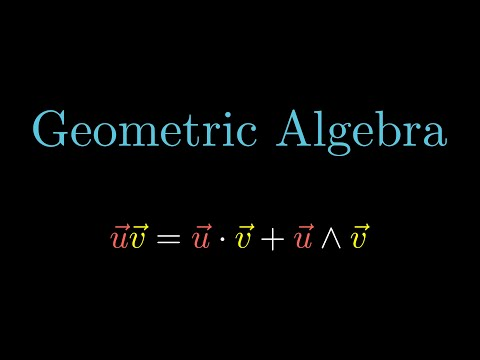

In [83]:
#hide_input
from IPython.display import HTML, YouTubeVideo
YouTubeVideo('60z_hpEAtD8')

* [This very handy list of properties](http://wackerart.de/mathematik/clifford_algebra.html)
* [These slides](https://www.ime.unicamp.br/~agacse2018/GA_Lecture1.pdf) by Joan Lasenby (Signal Processing Group, Trinity College, Cambridge)
* [John Denker's write-up](https://www.av8n.com/physics/clifford-intro.pdf)

## Other resources I have yet to read
* [PyTorch Quaternion Neural Networks](https://github.com/TParcollet/Quaternion-Neural-Networks)
* ["Embed Me If You Can: A Geometric Perceptron"](https://arxiv.org/pdf/2006.06507.pdf)
* This book chapter: ["Outlook for Clifford Algebra Based Feature and Deep Learning AI Architectures"](https://link.springer.com/chapter/10.1007/978-3-319-57027-3_6)
* [Something Twitter-y?](https://drive.google.com/file/d/15fTvrmP-Fht-u5iMMsq-4ie-7yEcgOcA/view)
* ....your suggestions?



## Probably best to stop reading here for now.
Everything from here down is, so far, just me screwing around with the `clifford` Python package in a free-from manner.  I seriously doubt it will be helpful to anyone else in its present form. i.e., you probably want to stop reading here. -S.H.

---


## Messing with `clifford` package

This notebook is ripped out of the `clifford` documentation: https://clifford.readthedocs.io/. and then extended. This notebook gives a terse introduction to using the `clifford` module, using a two-dimensional geometric algebra  as the context.


### Setup

First, import clifford and instantiate a two-dimensional algebra (G2),

In [3]:
%pip install clifford -q --use-feature=2020-resolver

You should consider upgrading via the '/Users/shawley/envs/fastai/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import clifford as cf

layout, blades = cf.Cl(2) # creates a 2-dimensional clifford algebra

Inspect blades.

In [5]:
blades 

{'': 1, 'e1': (1^e1), 'e2': (1^e2), 'e12': (1^e12)}

Assign blades to variables

In [6]:
e1 = blades['e1']
e2 = blades['e2']
e12 = blades['e12']

### Basics

In [7]:
e1*e2  # geometric product

OMP: Info #270: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


(1^e12)

In [8]:
e1|e2  # inner product 

0

In [9]:
e1^e2  # outer product

(1^e12)

### Reflection 

In [10]:
a = e1+e2     # the vector
n = e1        # the reflector
-n*a*n.inv()  # reflect `a` in hyperplane normal to `n`

-(1.0^e1) + (1.0^e2)

### Rotation

In [11]:
from math import e, pi

R = e**(pi/4*e12)  # enacts rotation by pi/2 
R

0.70711 + (0.70711^e12)

In [12]:
R*e1*~R    # rotate e1 by pi/2 in the e12-plane

-(1.0^e2)

In [13]:
import math

In [14]:
a_ = 2*e1 + e2
b_ = 0.7*(e1 + 2*e2)

Define non-orthogonal unit vectors a and b:

In [15]:
def unit(v):
    return v / math.sqrt(v*v)

a = unit(a_)
b = unit(b_)

In [16]:
a, b

((0.89443^e1) + (0.44721^e2), (0.44721^e1) + (0.89443^e2))

In [17]:
b*a*b

-(0.17889^e1) + (0.98387^e2)

In [18]:
a*b*a

(0.98387^e1) - (0.17889^e2)

... so a*b*a is b*a*b rotated by 90 degrees.

Here are two different versions of b:

In [19]:
b*a*a

(0.44721^e1) + (0.89443^e2)

In [20]:
a*a*b

(0.44721^e1) + (0.89443^e2)

....Note that in 2D, "trivectors" (e.g., $baa$ or $abb$ or $aab$) *don't exist as trivectors*.  A vector times a bivector is a vector (in 2D). 


Checking associativity:

In [21]:
(b*a)*b

-(0.17889^e1) + (0.98387^e2)

In [22]:
b*(a*b)

-(0.17889^e1) + (0.98387^e2)

And if we reverse the order we pick up a term of 2a^b:

In [23]:
((a*b)-2*(a^b))*b

-(0.17889^e1) + (0.98387^e2)

Are wedge and geometric product associative?

In [24]:
(a^b)*b

(0.53666^e1) - (0.26833^e2)

In [25]:
a^(b*b)

(0.89443^e1) + (0.44721^e2)

....seems that they are not.  What then is the proper order of operations?  Left to right or does vector product take precedence?

In [26]:
a*b

0.8 + (0.6^e12)

In [27]:
b*a

0.8 - (0.6^e12)

In [28]:
(a|b) - (a^b)

0.8 - (0.6^e12)

In [29]:
(a*b) - 2*(a^b)

0.8 - (0.6^e12)

In [30]:
c = (b*a)*b; c  # c = bab

-(0.17889^e1) + (0.98387^e2)

In [31]:
c - b*a*b

0

In [32]:
d = (-a*b)*b; d  # d = -abb = -a(b^2)  != c = bab

-(0.89443^e1) - (0.44721^e2)

In [33]:
d - (-a)

0

In [34]:
e = a*b*a; e  #  e = aba 

(0.98387^e1) - (0.17889^e2)

In [35]:
%pip install matplotlib -Uqq

Note: you may need to restart the kernel to use updated packages.


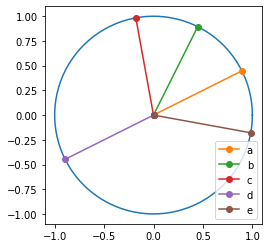

In [39]:
# I need to see this stuff.  Let's define a plotting routine in 2d
import matplotlib.pyplot as plt
import string
import numpy as np 

def doplot(v_list:list, labels=list(string.ascii_lowercase), loc='lower right'):
    t = np.linspace(0,2*np.pi,num=100)
    circle_x, circle_y = np.cos(t), np.sin(t)  # show the unit circle for reference. 
    plt.plot(circle_x, circle_y)

    for i,v in enumerate(v_list):
        x, y = e1|v, e2|v
        plt.plot((0,x),(0,y),'o-',label=labels[i])
        #plt.axis([-1, 1, -1, 1])
        plt.gca().set_aspect('equal')
        plt.legend(loc=loc)
    

doplot([a,b,c,d,e])

Note that $ba$ performs a rotation by the angle amount from $a$ to $b$, then applied to whatever comes after. so $baf$ takes $f$ and rotates by the angle you subtend when you go from $a$ to $b$

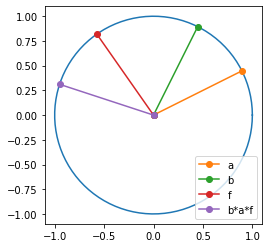

In [40]:
f = unit(-.7*e1 + e2)  # just some other vector
doplot([a,b,f,b*a*f], labels=['a','b','f','b*a*f'])

And (at least for unit vectors) this is the same as hitting the $f$ on the other side, and reversing the order of $a$ and $b$:

Permuting all three indices gives you the same result:

In [42]:
f*a*b - b*a*f

0

similarly:

In [43]:
d*c*a - a*c*d

0

Switching the order of the last one compared to a wedge (without permuting the wedge) gives you a minus sign:

In [44]:
(a^b)*f

(0.49154^e1) + (0.34408^e2)

In [45]:
f*(a^b)

-(0.49154^e1) - (0.34408^e2)

In [46]:
e1*(a^b)

(0.6^e2)

In [47]:
(a^b)*e1

-(0.6^e2)

In [48]:
e1^e2

(1^e12)

In [49]:
a^b

(0.6^e12)

In [50]:
a|b

0.8

In [51]:
a,b

((0.89443^e1) + (0.44721^e2), (0.44721^e1) + (0.89443^e2))

In [52]:
e1^e1

0

In [53]:
(a|e1)*(b|e2) - (a|e2)*(b|e1)

0.6

### Proving why f\*e12 = - e12\*f:

In [54]:
f*e12

-(0.81923^e1) - (0.57346^e2)

In [55]:
e12*f

(0.81923^e1) + (0.57346^e2)

In [56]:
f*e12 - (- e12*f)

0

In [57]:
f

-(0.57346^e1) + (0.81923^e2)

In [58]:
e1*e12

(1^e2)

In [59]:
e12*e1

-(1^e2)

In [60]:
f*e1

-0.57346 - (0.81923^e12)

= f1 + (f2 e2^e1) = f1 - f2 e1^e2  = $f_1 - f_2 e_{12}$  $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$[1]

In [61]:
e2*f

0.81923 + (0.57346^e12)

= f2 + e2^f1e1 = f2 -f1 e1^e2 =  $f_2 - f_1 e_{12}$  $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$[2]

In [62]:
e1*(e2*f)

(0.81923^e1) + (0.57346^e2)

= e1([2]) = e1 f2 e1(-f1e12) = $f_2 e_1 - f_1 e_2$ $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$[3]

In [63]:
(f*e1)*e2

-(0.81923^e1) - (0.57346^e2)

= [1] e2 = (  f1 - f2 e12 ) fe2   = $-f_2 e_1 + f_1 e_2 $ $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$[4] = - [3]

$\therefore$ f e1 e2 = - e1 e2 f 

Let's try a different set of random (2-)vectors:

In [67]:
import numpy as np
def rndvec():
    return (2*np.random.rand()-1)*e1 + (2*np.random.rand()-1)*e2 

In [70]:
# we could make these unit vectors but that obscures some complexity I want to see. 
u, v, w = [rndvec() for x in range(3)]; u, v, w

((0.61705^e1) - (0.28619^e2),
 (0.45191^e1) - (0.75477^e2),
 (0.18531^e1) - (0.50388^e2))

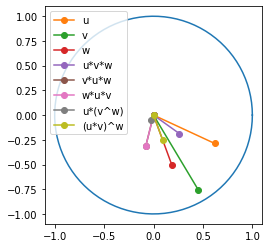

In [72]:
doplot([u,v,w,u*v*w,v*u*w,w*u*v,u*(v^w),(u*v)^w], labels=['u','v','w','u*v*w','v*u*w','w*u*v','u*(v^w)','(u*v)^w'],loc='upper left')

In the above, vuw (brown) and wuv (pink) are on top of each other, i.e. swapping the first and third vectors produces no change:

In [73]:
v*u*w - w*u*v

0

## Kinds of products, AKA WTH is a Kronecker product?
[The paper](https://arxiv.org/abs/2110.04176) uses "Kronecker Product".  Which...I didn't know what that is. I see on the internet that it's likened to the "tensor product". Which is like the "outer product". But is *different from* "exterior product" (even though "outer" and "exterior" should mean the same thing, they don't) because math history.  But the latter is the same as the wedge product. ...Yes?

...And all these are of course different from the dot product which is the same as "matrix multiplication" which is the same as the "@" symbol. 

Define a couple matrices

In [80]:
import numpy as np

A = np.array([[1,2,3],[4,5,6]]); A

array([[1, 2, 3],
       [4, 5, 6]])

In [81]:
B = np.array([[-0.1,.2,.3],[.4,-.5,.6]]); B

array([[-0.1,  0.2,  0.3],
       [ 0.4, -0.5,  0.6]])

Equivalince of "@", `dot` product and `matmul`:

In [82]:
A.T @ B

array([[ 1.5, -1.8,  2.7],
       [ 1.8, -2.1,  3.6],
       [ 2.1, -2.4,  4.5]])

In [83]:
np.dot(A.T,B)

array([[ 1.5, -1.8,  2.7],
       [ 1.8, -2.1,  3.6],
       [ 2.1, -2.4,  4.5]])

In [84]:
np.matmul(A.T,B)

array([[ 1.5, -1.8,  2.7],
       [ 1.8, -2.1,  3.6],
       [ 2.1, -2.4,  4.5]])

In [85]:
B.T @ A

array([[ 1.5,  1.8,  2.1],
       [-1.8, -2.1, -2.4],
       [ 2.7,  3.6,  4.5]])

Outer products:

In [98]:
print(np.outer(A,B))
np.outer(A,B).shape

[[-0.1  0.2  0.3  0.4 -0.5  0.6]
 [-0.2  0.4  0.6  0.8 -1.   1.2]
 [-0.3  0.6  0.9  1.2 -1.5  1.8]
 [-0.4  0.8  1.2  1.6 -2.   2.4]
 [-0.5  1.   1.5  2.  -2.5  3. ]
 [-0.6  1.2  1.8  2.4 -3.   3.6]]


(6, 6)

In [99]:
print(np.outer(B,A))
np.outer(B,A).shape

[[-0.1 -0.2 -0.3 -0.4 -0.5 -0.6]
 [ 0.2  0.4  0.6  0.8  1.   1.2]
 [ 0.3  0.6  0.9  1.2  1.5  1.8]
 [ 0.4  0.8  1.2  1.6  2.   2.4]
 [-0.5 -1.  -1.5 -2.  -2.5 -3. ]
 [ 0.6  1.2  1.8  2.4  3.   3.6]]


(6, 6)

In [100]:
# observe that outer(B,A) = outer(A,B).T:
np.abs(np.outer(B,A) - np.outer(A,B).T).flatten().sum()

0.0

Kronecker product is [np.kron](https://numpy.org/doc/stable/reference/generated/numpy.kron.html):

In [101]:
print(np.kron(A,B))
np.shape(np.kron(A,B))

[[-0.1  0.2  0.3 -0.2  0.4  0.6 -0.3  0.6  0.9]
 [ 0.4 -0.5  0.6  0.8 -1.   1.2  1.2 -1.5  1.8]
 [-0.4  0.8  1.2 -0.5  1.   1.5 -0.6  1.2  1.8]
 [ 1.6 -2.   2.4  2.  -2.5  3.   2.4 -3.   3.6]]


(4, 9)

...ok that is NOT the same as the `.outer` product! Same number of elements though. But the number `-0.3` appears in the Kronecker product yet nowehere in the outer product. 

Literature says Kronecker product AB is a "block" matrix where each component of A gets multiplied by B. This makes sense. It's a a 2x3 matrix times another 2x3 matrix.  I'd view that as 2x3x2x3 but numpy makes it a (2\*2)x(3\*3).  ...odd. ??

In [109]:
# does anything (anti-)commute in the Kronecker product? Let's try BA 
print(np.kron(B,A))
np.shape(np.kron(B,A))

[[-0.1 -0.2 -0.3  0.2  0.4  0.6  0.3  0.6  0.9]
 [-0.4 -0.5 -0.6  0.8  1.   1.2  1.2  1.5  1.8]
 [ 0.4  0.8  1.2 -0.5 -1.  -1.5  0.6  1.2  1.8]
 [ 1.6  2.   2.4 -2.  -2.5 -3.   2.4  3.   3.6]]


(4, 9)

...ok looks like some things change sign and some things don't, but the values don't seem to move around. Hmmm..

In [117]:
np.set_printoptions(precision=2, suppress=True)

print(np.kron(A,B) - np.kron(B,A),)

[[ 0.   0.4  0.6 -0.4  0.  -0.  -0.6  0.   0. ]
 [ 0.8  0.   1.2  0.  -2.  -0.   0.  -3.   0. ]
 [-0.8  0.  -0.   0.   2.   3.  -1.2  0.   0. ]
 [ 0.  -4.  -0.   4.   0.   6.   0.  -6.   0. ]]


...yea I don't understand that.



Maybe instead of matrices we should step down to vectors. Define a pair of random vectors. (We'll use 3 dimensions instead of 2 dims of the Clifford algebra.)

In [118]:
x = np.random.rand(3); x

array([0.68, 0.  , 0.43])

In [119]:
y = np.random.rand(3); y

array([0.93, 0.39, 0.86])

In [120]:
np.outer(x,y)

array([[0.63, 0.27, 0.59],
       [0.  , 0.  , 0.  ],
       [0.4 , 0.17, 0.37]])

In [121]:
np.outer(y,x)

array([[0.63, 0.  , 0.4 ],
       [0.27, 0.  , 0.17],
       [0.59, 0.  , 0.37]])

In [122]:
# lets make an antisymmetric matrix...
(np.outer(x,y) - np.outer(y,x))/2

array([[ 0.  ,  0.13,  0.09],
       [-0.13,  0.  , -0.08],
       [-0.09,  0.08,  0.  ]])

In [123]:
np.kron(x,y)

array([0.63, 0.27, 0.59, 0.  , 0.  , 0.  , 0.4 , 0.17, 0.37])

...that's just weird, man. ;-) 

In [124]:
np.kron(y,x)

array([0.63, 0.  , 0.4 , 0.27, 0.  , 0.17, 0.59, 0.  , 0.37])

That's kind of the same as kron(x,y) but rearranged.

...ok enough with the Kronecker product.  I think I know how to *do* it but not sure what it means / why we can't use...any of the other many "product" types available. 


Ok, back to wedges and clifs and whatnot.  A little more vector play:

In [77]:
u^v^w

0

In [78]:
(u*v*w) + (v*w*u) + (w*u*v)

(0.28095^e1) + (1.30851^e2)